**Due: 4 PM on Wednesday, 30 Mar 2016**

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc. is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Exercise 1 (25 points)**

- Write a function in C that calculates the mean of an array of doubles, putting the function declaration and function definition in separate files (10 points)
- Write a driver program to call the function with the inputs being an array containing the numbers 1,2,3,4,5 and print the results to standard output (5 pints)
- Write a `makefile` that compiles the executable upon calling `make` at the command line and removes all generated files upon calling `make clean`  (10 points)

In [1]:
%%file ex1.h

#pragma once

double mean(double xs[], int n);

Writing ex1.h


In [2]:
%%file ex1.c

double mean(double* xs, int n) {
    double s = 0.0;
    for (int i=0; i<n; i++) {
        s += xs[i];
    }
    return s/n;
}

Writing ex1.c


In [8]:
%%file main.c

#include <stdio.h>
#include "ex1.h"

int main() 
{
    double xs[] = {1, 2, 3, 4, 5};
    int n = sizeof(xs)/sizeof(xs[0]);
    printf("%.2f", mean(xs, n));
}

Overwriting main.c


In [9]:
%%file Makefile

main: main.o ex1.o
	 gcc -o main main.o ex1.o

main.o: main.c ex1.h
	 gcc -c main.c 

ex1.o: ex1.c ex1.h
	 gcc -c ex1.c

clean:
	 rm *.o

Overwriting Makefile


In [10]:
%%bash

make

gcc -c main.c 
gcc -c ex1.c
gcc -o main main.o ex1.o


In [11]:
%%bash

./main

3.00

**Exercise 2 (25 points)**

- Write a function `matrix_multiply` in C with the following function signature 
```
void matrix_multiply(double** A, double **B, double **C, int m, int n, int p)
```
The function multiples an $m \times n$ matrix $A$ with an $n \times p$ matrix $B$ and gives the result in the matrix $C$ (10 points)
- Write a function to pretty print a matrix to standard output, and use it to display $A$ and $B$. The output should look something like this (5 point):
```
[[3.0, 0.1, 5.0, 18.1],
   [7.8, 7.9, 3.2, 1.0],
   [6.1, 5.5, 8.9, 4.1]]
```

- Write a driver program to test it with the following matrices. Matrices should be generated using dynamic memory allocation, freeing up the memory when done (10 points)

$$
A = \pmatrix{1 & 2 & 3\\4 & 5 & 6}, B = \pmatrix{1 & 2 & 3 & 4\\5 & 6 & 7 & 8\\9 & 0 & 1 & 2}
$$

### A note on dynamic memory allocation

If we know the size of the array that we want to create, we can use automatic memory management and do not have to worry about pointers, `malloc` and `free`. Such arrays are said to be allocated on the `stack`, which comprises a small percentage of total memory. If you can, use automatic memory management - variables allocated on the stack are faster and cannot lead to memory leaks.

However, if we do not know the size before compilation, we need to use pointers to memory allocated using `malloc` or `calloc`, and remember to free up these pointers with `free` when we are done with them. This is known as dynamic memory management and the arrays are allocated on the `heap`, which is the bulk of total memory.

#### Automatic memory management on the stack

In [68]:
%%file ex2a.c

#include <stdio.h>
#include <stdlib.h>

// We need to give the size of xs since xs is just a pointer
int sum0(int xs[], int n) {
    int s = 0;
    for (int i=0; i<n; i++) {
        s += xs[i];
    }
    return s;
}

// Same thing as sum0
int sum1(int *xs, int n) {
    int s = 0;
    for (int i=0; i<n; i++) {
        s += *(xs + i);
    }
    return s;
}

// Same thing as sum0
int sum2(int *xs, int n) {
    int s = 0;
    for (int i=0; i<n; i++) {
        s += xs[i];
    }
    return s;
}

// 2D version
int array_sum1(int m, int n, int matrix[m][n]) {
    int s = 0;
    for (int i=0; i<m; i++) {
        for (int j=0; j<n; j++) {
                s += matrix[i][j];
        }
    }
    return s;
}

int main(int argc, char* argv[2])
{
    /***
    When you know how many elements are in the array before compilation.
    ***/

    // intialize - storage automatically calculated
    int v1[] = {1, 2, 3};

    // allocate storage for 5 ints
    int v2[5];

    // fill array v2
    for (int i=0; i<5; i++) {
        v2[i] = i;
    }
    
    // 2D array intialized
    int v3[3][3] = {{1,2,3}, {4,5,6}, {7,8,9}};

    // In modern C, we can even use automatic memory management
    // for variables created at run-time!
    if (argc == 3) {
        int m = atoi(argv[1]);
        int n = atoi(argv[2]);

        int v4[m][n]; // this is actually OK!
        for (int i=0; i<m; i++) {
            for (int j=0; j<n; j++) {
                v4[i][j] = i*j;
            }
        }

        printf("%d\n", array_sum1(m, n, v4));
    }

    // Callling various versions of sum
    printf("%d\n%d\n%d\n", sum0(v2, 5), sum1(v2, 5), sum2(v2, 5));
    printf("%d\n", array_sum1(3, 3, v3));
}

Overwriting ex2a.c


In [69]:
%%bash
gcc -std=c99 -o ex2a ex2a.c

In [70]:
%%bash
./ex2a

10
10
10
45


In [71]:
%%bash
./ex2a 3 4

18
10
10
10
45


#### Dynamic memory allocation

Sometimes however, you have no choice but to use dynamic memory allocation, for example, when the array is too big for the stack. 

In [86]:
%%file ex2b.c

#include <stdio.h>
#include <stdlib.h>

// Same thing as sum0
int sum(int *xs, int n) {
    int s = 0;
    for (int i=0; i<n; i++) {
        s += xs[i];
    }
    return s;
}

// Using pointer arithmetic to simulate 2D array
// This is probably easier to desl with than true 2D arrays
int array_sum(int m, int n, int *matrix) {
    int s = 0;
    for (int i=0; i<m; i++) {
        for (int j=0; j<n; j++) {
            s += matrix[i*n + j];
        }
    }
    return s;
}

int main(int argc, char* argv[2])
{
    /***
    When you know how many elements are in the array before compilation.
    ***/

    // v1 contents are garbage before assignment
    int *v1 = malloc(sizeof(int) * 3);
    for (int i=0; i<3; i++) {
        v1[i] = i;
    }

    // v2 contents are zero before assignment
    int *v2 = calloc(sizeof(int), 5);
    for (int i=0; i<5; i++) {
        v2[i] = i;
    }

    // allocate storage for a matrix as a vector
    int rows = 3;
    int cols = 4;
    int *v3 = calloc(sizeof(int), rows*cols);
    for (int i=0; i<rows; i++) {
        for (int j=0; j<cols; j++) {
            v3[i*cols + j] = i*j;
        }
    }

    // Callling various versions of sum
    printf("%d\n%d\n", sum(v1, 3), sum(v2, 5));
    printf("%d\n", array_sum(3, 4, v3));

    // free up stroage
    free(v1);
    free(v2);
    free(v3);
}

Overwriting ex2b.c


In [87]:
%%bash
gcc -std=c99 -o ex2b ex2b.c

In [88]:
%%bash
./ex2b

3
10
18


#### Solution to homework exercise

Pointers to pointers can be confusing. One way to think about them is to treat `*int` as `int[]` - i.e. a pointer to `int` is the same as an array of `int`. Then `**int` is `int[][]` - i.e. a pinter to a pointer to `int` is an array of arrays of `int`. The form `**int` as `*int[]` is also helpful - interpret as a pointer to an array of `int`.

In [4]:
%%file ex2.c
#include <stdio.h>
#include <stdlib.h>

void matrix_multiply(double** A, double** B, double** C, int m, int n, int p) {
    for (int i = 0; i < m; i++) {
        for (int j = 0; j < p; j++) {
            for (int k = 0; k < n; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main()
{
    int m=2, n=3, p=4;   

    // A points to an array of pointers, each of which points to an array of doubles
    double **A = malloc(m * sizeof(double*));
    // Allocate memory to A[i] which points to an array of doubles
    for(int i = 0; i < m; i++) {
        A[i] = malloc(n * sizeof(double));
    }

    double **B = malloc(n * sizeof(double*));
    for(int i = 0; i < n; i++) {
        B[i] = malloc(p * sizeof(double));
    }

    double **C = malloc(m * sizeof(double*));
    for(int i = 0; i < m; i++) {
        C[i] = calloc(sizeof(double), p);
    }


    A[0][0] = 1;
    A[0][1] = 2;
    A[0][2] = 3;
    A[1][0] = 4;
    A[1][1] = 5;
    A[1][2] = 6;

    B[0][0] = 1;
    B[0][1] = 2;
    B[0][2] = 3;
    B[0][3] = 4;
    B[1][0] = 5;
    B[1][1] = 6;
    B[1][2] = 7;
    B[1][3] = 8;
    B[2][0] = 9;
    B[2][1] = 0;
    B[2][2] = 1;
    B[2][3] = 2;
    
    matrix_multiply(A, B, C, m, n, p);

    for (int i = 0; i < m; i++) {
        for (int j = 0; j < p; j++) {
            printf("%6.1f", C[i][j]);
        }
        printf("\n");
    }

    for (int i = 0; i < m; i++) {
        free(A[i]);
    }
    free(A);

    for (int i = 0; i < n; i++) {
        free(B[i]);
    }
    free(B);

    for (int i = 0; i < m; i++) {
        free(C[i]);
    }
    free(C);

}

Overwriting ex2.c


In [5]:
%%bash
gcc -o ex2 ex2.c

In [6]:
%%bash
./ex2

  38.0  14.0  20.0  26.0
  83.0  38.0  53.0  68.0


**Exercise 3 (25 points)**

- Implement the secant method in 1D for root finding in C++. Pass in the function as a generalized function pointer. Use the method to find all roots of the polynomial equation $f(x) = x^3 - 7x - 6$ (20 points)
- Write the roots to a text file that can be read in Python and plot the roots and polynomial using Python (5 points)

In [7]:
%%file ex3.cpp
#include <iostream>
#include <vector>
#include <numeric>
#include <iomanip>
#include <cmath>
using std::vector;
using std::cout;
using std::function;

using func = function<double(double)>;

double secant(double x0, double x1, func f, int max_iter=100) {
    double x = x1;
    for (int i=0; i<max_iter; i++) {
        x -= f(x) * (x - x0)/(f(x) - f(x0));
        x0 = x1;
    }
    return x;
}

int main()
{
    
    auto f = [](double x) { return pow(x, 3) - 7*x - 6; };
    
    vector<double> x = {-5, -1, 5};
    for (auto& x0: x) {
        cout << std::setw(2) << x0 << ": " << std::setw(3) << secant(x0, x0+1, f) << "\n";
    }
}

Writing ex3.cpp


In [8]:
%%bash
g++ -std=c++11 ex3.cpp -o ex3

In [9]:
%%bash
./ex3

-5:  -2
-1:  -1
 5:   3


**Exercise 4 (25 points)**

You are given the following set of data

$$
x = \pmatrix{0 \\ 1 \\ 2 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \\ 9}, 
y = \pmatrix{1.5 \\ 7.5 \\ 10.7 \\ 7.9 \\ -2.0 \\ -12.4 \\ -28.6 \\ -46.3 \\ -68.1 \\ -97.1}
$$

- Write your own **gradient descent** optimization function in C++ to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Use a starting value of $\hat{\beta} = \pmatrix{0 \\0 \\ 0}$, learning rate $\alpha = 0.000001$ and run for 1000000 iterations. You may use the `armadillo` library (20 points)
- Write the solution to a text file that can be read in Python and plot the least squares quadratic fit together with the data points using Python (5 points)

In [10]:
%%file ex4.cpp
#include <iostream>
#include <fstream>
#include <armadillo>
using std::cout;
using std::ofstream;
using std::function;
using namespace arma;

using func = function<vec(mat, vec, vec)>;

vec gd(mat x, vec y, vec b0, func grad, double alpha=0.001, int max_iters=100) {
    vec b = b0;
    for (int i=0; i<max_iters; i++) {
        b -= alpha * grad(x, y, b);
    }
    return b;
}

vec grad(mat x, vec y, vec b) {
    return x.t()*x*b - x.t()*y;
}

int main() 
{

    vec x = linspace<vec>(10.0,15.0,10);
    vec eps = 10*randn<vec>(10);
    vec y = 3*x%x - 7*x + 2 + eps; 

    cout << "x:\n" << x << "\n";
    cout << "y:\n" << y << "\n";

    cout << "Lenght of x is: " << norm(x) << "\n";
    cout << "Lenght of y is: " << norm(y) << "\n";

    cout << "Distance(x, y) is: " << norm(x -y) << "\n";

    cout << "Correlation(x, y) is: " << cor(x, y) << "\n";

    mat A = join_rows(ones<vec>(10), x);
    A = join_rows(A, x%x);
    cout << "A:\n" << A << "\n";

    vec b = {0.0, 0.0, 0.0};
    b = gd(A, y, b, grad, 0.000001, 1000000);
    cout << "b:\n" << b << "\n";

    ofstream fout1("x.txt");
    x.print(fout1);
    ofstream fout2("y.txt");
    y.print(fout2);
    ofstream fout3("b.txt");
    b.print(fout3);
}

Writing ex4.cpp


In [11]:
%%bash
g++ -std=c++11 ex4.cpp -o ex4 -larmadillo 

In [12]:
%%bash
./ex4

x:
   10.0000
   10.5556
   11.1111
   11.6667
   12.2222
   12.7778
   13.3333
   13.8889
   14.4444
   15.0000

y:
   2.4802e+02
   2.6412e+02
   2.9157e+02
   3.3056e+02
   3.4089e+02
   3.9573e+02
   4.4029e+02
   4.7583e+02
   5.2827e+02
   5.8404e+02

Lenght of x is: 39.8493
Lenght of y is: 1280.16
Distance(x, y) is: 1240.76
Correlation(x, y) is:    0.9887

A:
   1.0000e+00   1.0000e+01   1.0000e+02
   1.0000e+00   1.0556e+01   1.1142e+02
   1.0000e+00   1.1111e+01   1.2346e+02
   1.0000e+00   1.1667e+01   1.3611e+02
   1.0000e+00   1.2222e+01   1.4938e+02
   1.0000e+00   1.2778e+01   1.6327e+02
   1.0000e+00   1.3333e+01   1.7778e+02
   1.0000e+00   1.3889e+01   1.9290e+02
   1.0000e+00   1.4444e+01   2.0864e+02
   1.0000e+00   1.5000e+01   2.2500e+02

b:
   0.1041
  -6.8666
   2.9947



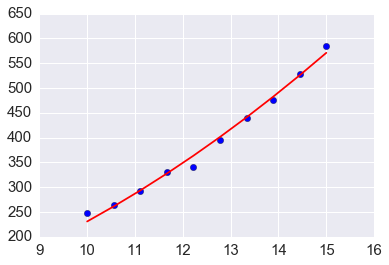

In [171]:
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
b = np.loadtxt('b.txt')

plt.scatter(x, y, s=40)
plt.plot(x, b[0] + b[1]*x + b[2]*x**2, c='red')
pass